# **0. Imports**

In [ ]:
pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, MultiHeadAttention, LayerNormalization, Dropout, Dense
from tensorflow.keras.models import Sequential
print(tf.__version__)

2.13.0


In [ ]:
!pip install pydub

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa

# **1. Data**

**1.1 Import MP3 from Drive and extract AudioSegment**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Data

/content/drive/My Drive/Data


In [ ]:
!ls

'AAPL 2.csv'  'Duskus - Gods.mp3'	 reconstructed_audio.wav
'AAPL 4.csv'   reconstructed_audio.mp3


In [ ]:
# Import mp3
audio = AudioSegment.from_mp3('Duskus - Gods.mp3')

**1.2 Extract Y(t)**

In [ ]:
# Convert to NumPy array and merge stereo channels to mono
audio_data = np.array(audio.get_array_of_samples())
audio_data = np.mean(audio_data.reshape(-1, 2), axis=1)  # Merge stereo to mono

# Sample rate
SAMPLE_RATE = audio.frame_rate

# Determine the number of channels
NUM_CHANNELS = audio.channels

# Clean up leading and trailing 0s
cleaned_audio_data = np.trim_zeros(audio_data)

# Data qualities
NUM_SAMPLES = np.shape(cleaned_audio_data)[0]

# Calculate the duration in seconds for stereo audio
LENGTH_IN_SECONDS = NUM_SAMPLES / SAMPLE_RATE

In [ ]:
cleaned_audio_data

array([ 0.5,  0. ,  0. , ...,  0. ,  0. , -0.5])

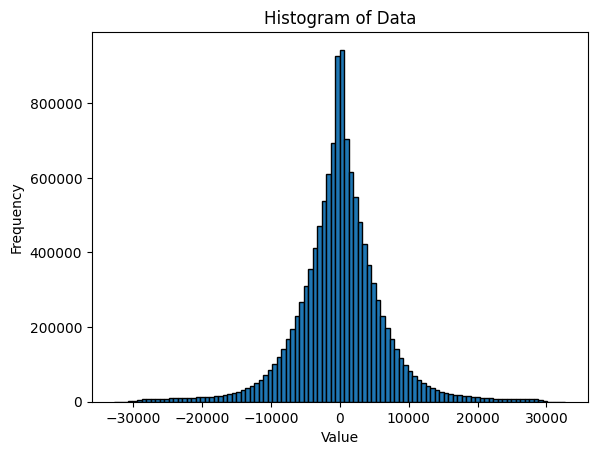

In [ ]:
# Create a histogram
plt.hist(cleaned_audio_data, bins=100, edgecolor='k')  # You can adjust the number of bins as needed

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()

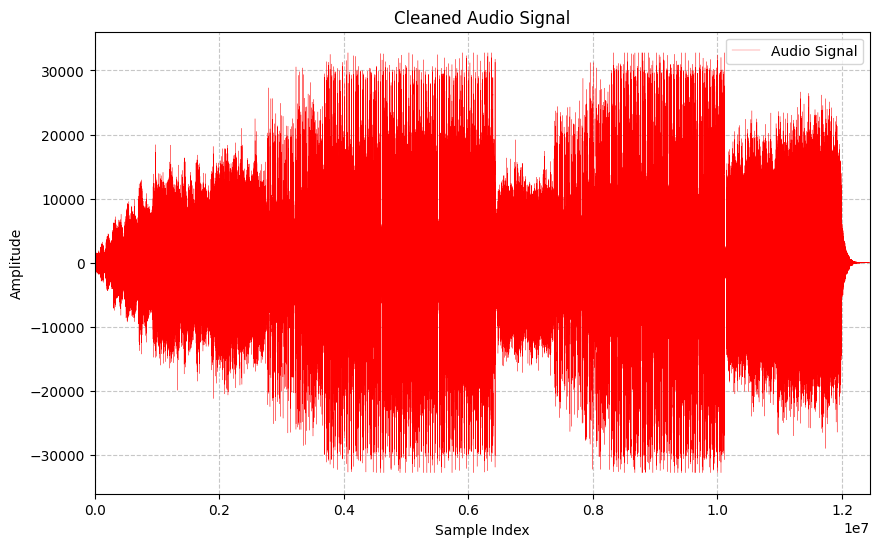

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cleaned audio data with improved formatting
ax.plot(cleaned_audio_data, linewidth=0.2, color='r', label='Audio Signal')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Amplitude')
ax.set_title('Cleaned Audio Signal')
ax.legend()

# Display the grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize other plot parameters as needed (e.g., axis limits)
ax.set_xlim(0, len(cleaned_audio_data))
# ax.set_ylim(-32768, 32767)

# Show the plot
plt.show()

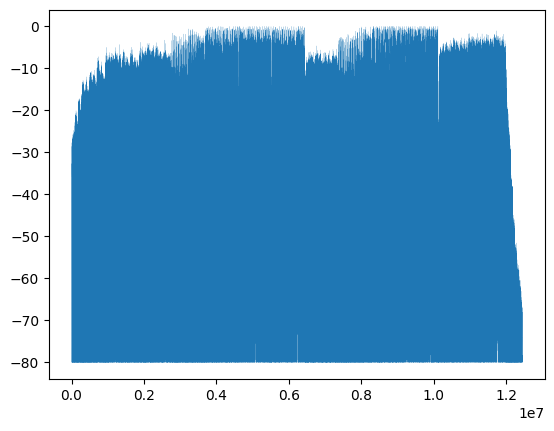

In [ ]:
# Convert audio data to dB scale
db_audio = librosa.amplitude_to_db(np.abs(cleaned_audio_data), ref=np.max)

# Normalize dB values to the range [0, 1]
min_db = np.min(db_audio)
max_db = np.max(db_audio)
normalized_audio = (db_audio - min_db) / (max_db - min_db)

plt.plot(db_audio, linewidth=0.1)